In [8]:
import pandas as pd
import numpy as np
data = pd.read_csv("resources/train.csv")

import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
def sigmoid(z):
    return (1.0/(1.0+np.exp(-z)))

def sigmoid_grad(z):
    return (sigmoid(z)*(1-sigmoid(z)))

In [113]:
input_layer_size = 400 #20x20 grid
hidden_layer_size = 25
epsilon = 0.12
df = data.set_index("id")
delta_1 = df[df.delta == 1] #one step values only
delta_1 = delta_1.as_matrix(columns=None) #dataframe to matrix
#detla_1 = np.asmatrix(delta_1)
#num_labels = delta_1.shape[0] #number of rows in the matrix

In [114]:
s1 = delta_1[0,:400]
e1 = delta_1[0,400:800]
s1 = np.asmatrix(s1)
e1 = np.asmatrix(e1)
s1 = np.reshape(s1, (20,20))
e1 = np.reshape(e1, (20,20))

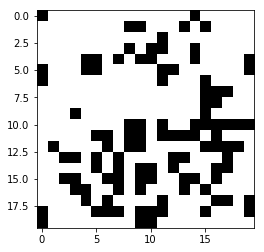

In [62]:
#plot
#plt.subplot(211)
plt.imshow(s1, cmap='Greys')

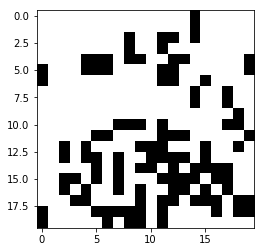

In [63]:
#plt.subplot(212)
plt.imshow(e1, cmap='Greys')

In [311]:
#split data into X,y and d (start, end and delta)
X = delta_1[:,1:401]
y = delta_1[:,401:801]
d = delta_1[:,0]

#add bias node values
dim = np.shape(X);
bias = np.ones((dim[0],1));
X = np.c_[bias, X] #vector and array concat
print(np.shape(X))

(9880, 401)


In [296]:
#initialize the weights (theta)
theta1 = np.random.rand(hidden_layer_size, input_layer_size)
theta2 = np.random.rand(dim[1], hidden_layer_size)
bias_1 = np.ones((hidden_layer_size,1)); #25 x 1
#print(np.shape(bias_1))
#theta1
theta1 = theta1 * 2 * epsilon - epsilon #25x400
#theta1 = np.c_[bias, theta1]
#theta1 = theta1[None,:]
#print(np.shape(theta1))

#theta2
bias_2 = np.ones((dim[1],1)) #400 x 1
#print("bias2")
#print(np.shape(bias)) 
theta2 = theta2 * 2 * epsilon - epsilon
#print(np.shape(theta2))
#theta2 = np.c_[bias, theta2]

theta1 = np.c_[bias_1, theta1]
theta2 = np.c_[bias_2, theta2]
temp_theta1 = theta1.flatten()
temp_theta1 = temp_theta1[None,:]

temp_theta2 = theta2.flatten()
temp_theta2 = temp_theta2[None,:]
print(np.shape(theta2))
theta = np.c_[temp_theta1, temp_theta2]
print(np.shape(theta))
theta1 = np.reshape(theta[:,0:10025], (25, 401))
theta2 = np.reshape(theta[:,10025:20425], (400,26))
print(np.shape(theta2))

(400, 26)
(1, 20425)
(400, 26)


In [299]:
#cost function
def compute_cost(X, theta):
    cost = 0
    theta1 = np.reshape(theta[:,0:10025], (25, 401))
    theta2 = np.reshape(theta[:,10025:20425], (400,26))
    
    cap_d_1 = np.zeros((np.shape(theta1)[0],np.shape(theta1)[1]))
    cap_d_2 = np.zeros((np.shape(theta2)[0],np.shape(theta2)[1]))

    Theta1_grad = np.zeros((np.shape(theta1)[0],np.shape(theta1)[1]))
    Theta2_grad = np.zeros((np.shape(theta2)[0],np.shape(theta2)[1]))

    for i in range(dim[0]):
        a_1 = X[i,:]
        a_1 = a_1[None,:]
        z_2 = np.dot(a_1, np.transpose(theta1))
        a_2 = sigmoid(z_2)
        a_2 = np.c_[1, a_2]
        z_3 = np.dot(a_2, np.transpose(theta2))
        a_3 = sigmoid(z_3)
        h_x = a_3
        y_i = y[i][None,:]
        cost = cost + np.sum(-y_i * np.log(h_x) - (1-y_i) * np.log(1 - h_x))
        #back propagation
        d_3 = a_3 - y_i
        d_2 = np.dot(d_3, theta2) * sigmoid_grad(np.c_[1, z_2])
        #cap delta
        cap_d_1 = cap_d_1 + np.dot(np.transpose(d_2[:,1:]), a_1)
        cap_d_2 = cap_d_2 + np.dot(np.transpose(d_3), a_2)

    #lam since lambda is a reserved word
    lam = 1
    m = dim[0]
    reg = (lam / (2 * m)) * (np.sum(np.sum(theta1[:,1:input_layer_size+1]**2))) + np.sum(np.sum(theta2[:,1:hidden_layer_size+1]**2)); 

    cost = (1/m) * cost + reg;

    Theta1_grad = cap_d_1 / m;
    Theta2_grad = cap_d_2 / m;

    #regularization
    Theta1_grad[:, 1:input_layer_size + 1] = Theta1_grad[:, 1:input_layer_size + 1] + (lam/m) * theta1[:, 1:input_layer_size + 1];
    Theta2_grad[:, 1:hidden_layer_size + 1] = Theta2_grad[:, 1:hidden_layer_size + 1] + (lam/m) * theta2[:, 1:hidden_layer_size + 1];
    
    temp_theta1 = Theta1_grad.flatten()
    temp_theta2 = Theta2_grad.flatten()
    temp_theta1 = temp_theta1[None,:]
    temp_theta2 = temp_theta2[None,:]
    grad = np.c_[temp_theta1, temp_theta2]
    return (cost, grad)

In [313]:
#gradient descent
numIters = 10
alpha = 0.01
for i in range(0, numIters):
    (cost, grad) = compute_cost(X, theta);
    theta = theta - alpha * grad
    print(cost)

290.485491358
290.648309639
290.810080317
290.970820729
291.130547969
291.289278891
291.447030109
291.603817996
291.759658688
291.914568083


In [301]:
theta

array([[ 0.8999928 ,  0.08996153,  0.09830222, ..., -0.0442268 ,
        -0.13796562, -0.17456665]])